In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
from lstm_normalize import prepare_data, add_indicators, add_lags, split_data, normalize_data, prepare_sequences, prepare_tensors, split_train_and_test_data, get_lstm_data
from utils.chart import config_chart
from constants import SP500_TICKER

---

## For **prepare_data** function

In [3]:
data = prepare_data(SP500_TICKER)
data

,Open,High,Low,Close,Change,Volume,Year,Month,Day
0,1469.250000,1478.000000,1438.359985,1455.219971,-14.030029,931800000,2000,1,3
1,1455.219971,1455.219971,1397.430054,1399.420044,-55.799927,1009000000,2000,1,4
2,1399.420044,1413.270020,1377.680054,1402.109985,2.689941,1085500000,2000,1,5
3,1402.109985,1411.900024,1392.099976,1403.449951,1.339966,1092300000,2000,1,6
4,1403.449951,1441.469971,1400.729980,1441.469971,38.020020,1225200000,2000,1,7
...,...,...,...,...,...,...,...,...,...
6053,4886.660156,4898.149902,4869.339844,4894.160156,7.500000,4020430000,2024,1,25
6054,4888.910156,4906.689941,4881.470215,4890.970215,2.060059,3353400000,2024,1,26
6055,4892.950195,4929.310059,4887.399902,4927.930176,34.979980,3525160000,2024,1,29
6056,4925.890137,4931.089844,4916.270020,4924.970215,-0.919922,3836130000,2024,1,30


In [4]:
data.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Change    float64
Volume      int64
Year        int32
Month       int32
Day         int32
dtype: object

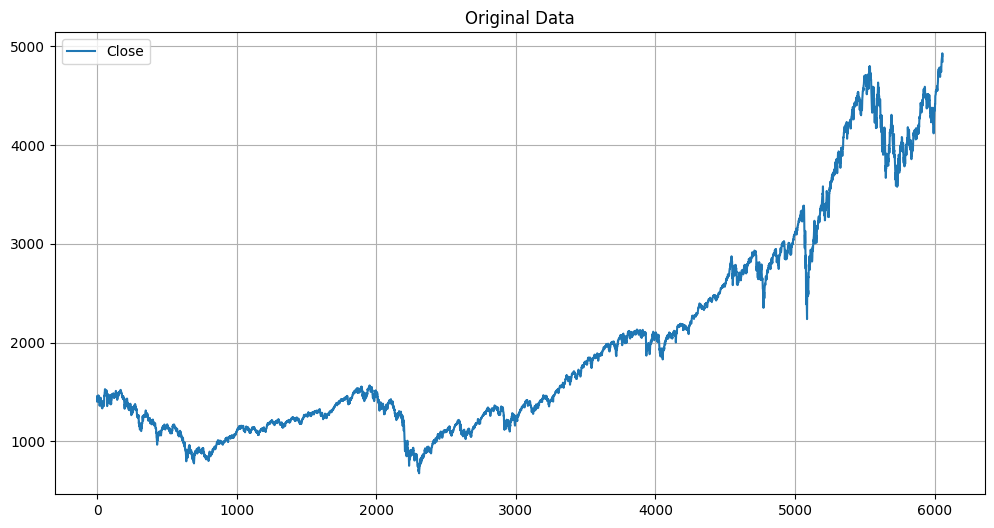

In [5]:
plt = config_chart('Original Data')
plt.plot(data['Close'])
plt.legend(['Close'])

In [6]:
# plt = config_chart('Original Data')
# plt.plot(data['Change'])
# plt.legend(['Change'])

---

## For **add_indicators** function

In [7]:
extended_data = add_indicators(data)
extended_data

,Open,High,Low,Close,Change,Volume,Year,Month,Day,MA25,MA50,MA100,RSI
99,1373.859985,1401.750000,1361.089966,1399.050049,25.190063,1152300000,2000,5,24,1430.064404,1454.346997,1428.297998,44.368469
100,1399.050049,1411.650024,1373.930054,1381.520020,-17.530029,984500000,2000,5,25,1428.226406,1454.134597,1427.560999,41.539809
101,1381.520020,1391.420044,1369.750000,1378.020020,-3.500000,722600000,2000,5,26,1425.965605,1452.525598,1427.346998,40.978078
102,1378.020020,1422.449951,1378.020020,1422.449951,44.429932,844200000,2000,5,30,1425.669204,1451.685198,1427.550398,50.186817
103,1422.439941,1434.489990,1415.500000,1420.599976,-1.839966,960500000,2000,5,31,1423.395605,1450.964597,1427.721898,49.838139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6053,4886.660156,4898.149902,4869.339844,4894.160156,7.500000,4020430000,2024,1,25,4775.296465,4677.269023,4507.758813,72.932465
6054,4888.910156,4906.689941,4881.470215,4890.970215,2.060059,3353400000,2024,1,26,4780.200469,4686.857432,4511.510815,72.142640
6055,4892.950195,4929.310059,4887.399902,4927.930176,34.979980,3525160000,2024,1,29,4789.383672,4695.502031,4515.821816,75.458828
6056,4925.890137,4931.089844,4916.270020,4924.970215,-0.919922,3836130000,2024,1,30,4796.512480,4703.943838,4520.416719,74.691975


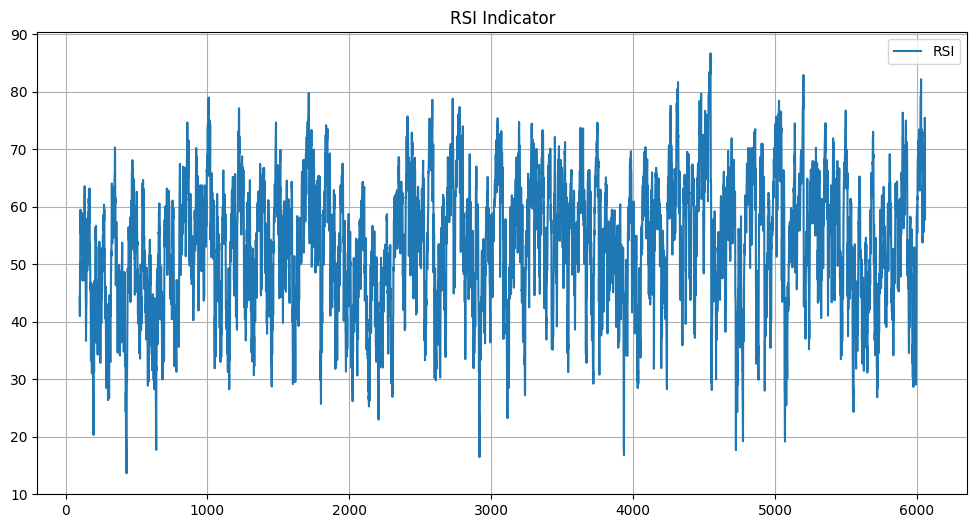

In [8]:
plt = config_chart('RSI Indicator')
plt.plot(extended_data['RSI'])
plt.legend(['RSI'])

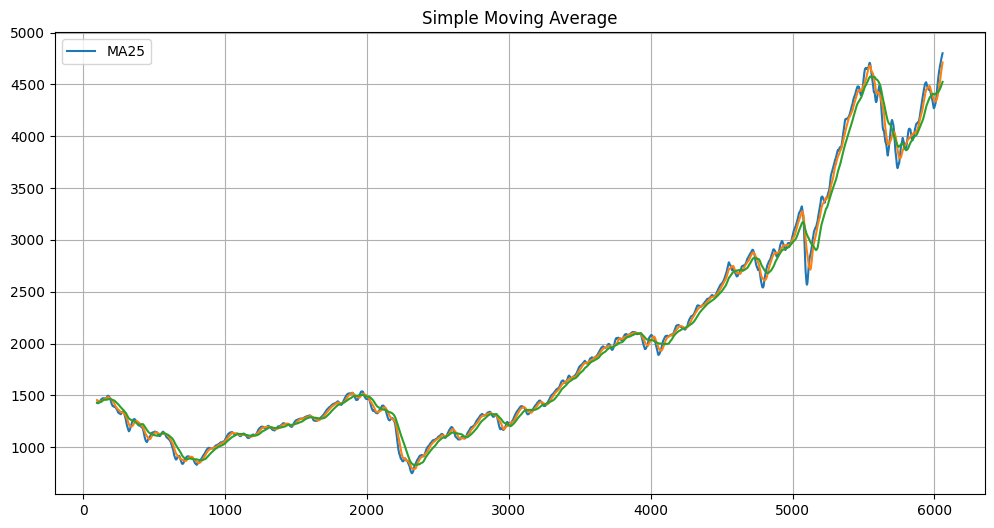

In [9]:
plt = config_chart('Simple Moving Average')
plt.plot(extended_data['MA25'])
plt.plot(extended_data['MA50'])
plt.plot(extended_data['MA100'])
plt.legend(['MA25'])

---

## For add_lags function

In [10]:
extended_data = add_lags(extended_data)
extended_data

,index,Open,High,Low,Close,Change,Volume,Year,Month,Day,MA25,MA50,MA100,RSI,lag_1,lag_2,lag_3,lag_4
0,103,1422.439941,1434.489990,1415.500000,1420.599976,-1.839966,960500000,2000,5,31,1423.395605,1450.964597,1427.721898,49.838139,44.429932,-3.500000,-17.530029,25.190063
1,104,1420.599976,1448.810059,1420.599976,1448.810059,28.210083,960100000,2000,6,1,1422.908408,1450.063398,1427.795299,54.975138,-1.839966,44.429932,-3.500000,-17.530029
2,105,1448.810059,1483.229980,1448.810059,1477.260010,28.449951,1162400000,2000,6,2,1423.402007,1449.595798,1427.991899,59.481733,28.210083,-1.839966,44.429932,-3.500000
3,106,1477.260010,1477.280029,1464.680054,1467.630005,-9.630005,838600000,2000,6,5,1424.010005,1448.401399,1428.282599,57.387881,28.449951,28.210083,-1.839966,44.429932
4,107,1467.630005,1471.359985,1454.739990,1457.839966,-9.790039,950100000,2000,6,6,1423.593604,1447.008999,1428.538499,55.258260,-9.630005,28.449951,28.210083,-1.839966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,6053,4886.660156,4898.149902,4869.339844,4894.160156,7.500000,4020430000,2024,1,25,4775.296465,4677.269023,4507.758813,72.932465,-20.010254,7.800293,-2.989746,43.530273
5951,6054,4888.910156,4906.689941,4881.470215,4890.970215,2.060059,3353400000,2024,1,26,4780.200469,4686.857432,4511.510815,72.142640,7.500000,-20.010254,7.800293,-2.989746
5952,6055,4892.950195,4929.310059,4887.399902,4927.930176,34.979980,3525160000,2024,1,29,4789.383672,4695.502031,4515.821816,75.458828,2.060059,7.500000,-20.010254,7.800293
5953,6056,4925.890137,4931.089844,4916.270020,4924.970215,-0.919922,3836130000,2024,1,30,4796.512480,4703.943838,4520.416719,74.691975,34.979980,2.060059,7.500000,-20.010254


---
## For split_data function

In [11]:
indicators_train, indicators_test, target_train, target_test = split_data(extended_data)
indicators_train.shape, indicators_test.shape, target_train.shape, target_test.shape

((4764, 17), (1191, 17), (4764,), (1191,))

---

## For **normalize_data** function

In [12]:
# normalized_data = normalize_data(data)
# normalized_data

In [13]:
# plt = config_chart('Normalized Data')
# plt.plot(normalized_data)
# plt.legend(['Open', 'High', 'Low', 'Close'])

----

## For **prepare_sequences** function

In [14]:
x, y = prepare_sequences(extended_data)

In [15]:
x.shape, y.shape

((5950, 5, 17), (5950,))

In [16]:
y

array([1471.35998535, 1461.67004395, 1456.94995117, ..., 4927.93017578,
       4924.97021484, 4845.64990234])

In [17]:
y[0]

1471.3599853515625

In [18]:
x[0]

array([[ 1.03000000e+02,  1.42243994e+03,  1.43448999e+03,
         1.41550000e+03, -1.83996582e+00,  9.60500000e+08,
         2.00000000e+03,  5.00000000e+00,  3.10000000e+01,
         1.42339561e+03,  1.45096460e+03,  1.42772190e+03,
         4.98381394e+01,  4.44299316e+01, -3.50000000e+00,
        -1.75300293e+01,  2.51900635e+01],
       [ 1.04000000e+02,  1.42059998e+03,  1.44881006e+03,
         1.42059998e+03,  2.82100830e+01,  9.60100000e+08,
         2.00000000e+03,  6.00000000e+00,  1.00000000e+00,
         1.42290841e+03,  1.45006340e+03,  1.42779530e+03,
         5.49751378e+01, -1.83996582e+00,  4.44299316e+01,
        -3.50000000e+00, -1.75300293e+01],
       [ 1.05000000e+02,  1.44881006e+03,  1.48322998e+03,
         1.44881006e+03,  2.84499512e+01,  1.16240000e+09,
         2.00000000e+03,  6.00000000e+00,  2.00000000e+00,
         1.42340201e+03,  1.44959580e+03,  1.42799190e+03,
         5.94817325e+01,  2.82100830e+01, -1.83996582e+00,
         4.44299316e+01, -3.5

In [19]:
# plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
# plt.plot(x_dates[0], x[0, :, 1])
# plt.plot(x_dates[0], x[0, :, 2])
# plt.plot(y_dates[0], y[0, :, 1])
# plt.plot(y_dates[0], y[0, :, 2])
# plt.legend(['Direction X', 'Change X', 'Direction Y', 'Change Y'])


NameError: name 'x_dates' is not defined

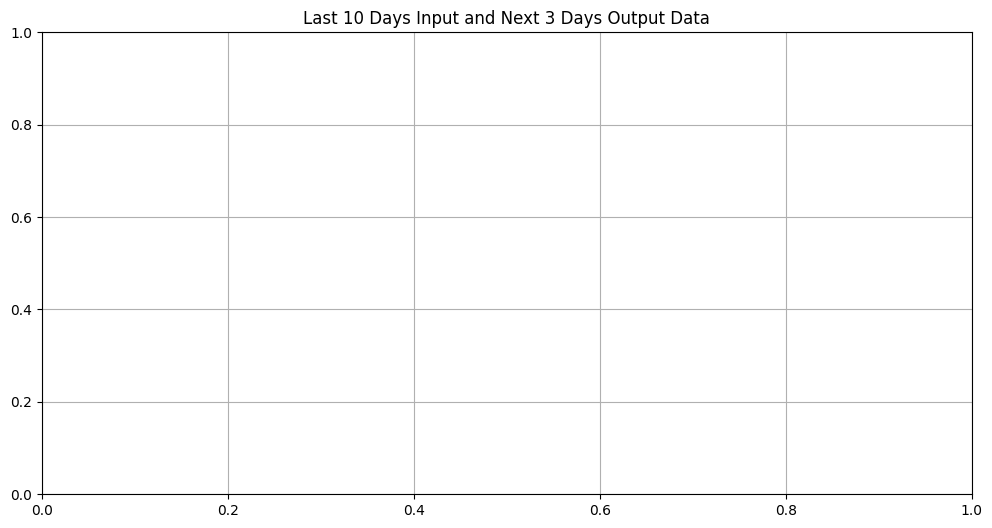

In [20]:
plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
plt.plot(x_dates[0], x[0, :, 0])
plt.plot(y_dates[0], y[0, :, 0])
plt.legend(['Price X', 'Price Y'])

---

## For **split_train_and_test_data** function

In [ ]:
train, test, predict = split_train_and_test_data(x, y, x_dates, y_dates)

In [ ]:
train['x'].shape,  train['x_dates'].shape, train['y'].shape,  train['y_dates'].shape

In [ ]:
test['x'].shape, test['x_dates'].shape, test['y'].shape, test['y_dates'].shape

In [ ]:
predict['x'].shape, predict['x_dates'].shape, predict['y'].shape, predict['y_dates'].shape

In [ ]:
plt = config_chart('Model Data')
plt.plot(train['y_dates'][:, 0], train['y'][:, 0, 0])
plt.plot(test['y_dates'][:, 0], test['y'][:, 0, 0])
plt.plot(predict['y_dates'][:, 0], predict['y'][:, 0, 0])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **prepare_tensors** function

In [ ]:
# x_train, y_train = prepare_tensors(train['x'], train['y'])
# x_test, y_test = prepare_tensors(test['x'], test['y'])
# x_predict, y_predict = prepare_tensors(predict['x'], predict['y'])

In [ ]:
# x_train.shape, y_train.shape

In [ ]:
# print('x_train:', x_train.shape)
# print(x_train[0])

In [ ]:
# print('y_train:', y_train.shape)
# print(y_train[0])

In [ ]:
# x_test.shape, y_test.shape

In [ ]:
# print('x_test:',x_test.shape)
# print(x_test[0])

In [ ]:
# print('y_test:',y_test.shape)
# print(y_test[0])

---

## For **get_lstm_data** function

In [ ]:
train, test, predict = get_lstm_data(SP500_TICKER)

In [ ]:
print(train["x"].shape) 
print(train["x"][0])

print(train["y"].shape)
print(train["y"][0])


In [ ]:
print(test.x.shape) 
print(test.x[0])

print(test.y.shape)
print(test.y[0])

In [ ]:
print(predict.x.shape) 
print(predict.x[0])

print(predict.y.shape)
print(predict.y[0])